In [1]:
# import des librairies dont nous aurons besoin
import sys
sys.path.append('../../utilities')
from backtesting import Backtesting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as st

# chargement
data = pd.read_csv('recuperateur.csv')


In [2]:
#affichage des données
data.head()

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct


In [4]:
data.dtypes

date            object
date.1          object
symbol          object
position        object
reason          object
price          float64
frais          float64
fiat           float64
coins          float64
wallet         float64
resultat       float64
resultat%      float64
tradeIs         object
walletAth      float64
drawDown       float64
drawDownPct    float64
dtype: object

In [5]:
data.isnull().sum()
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = data.isnull().sum()
nb_na[nb_na>0]

resultat     1822
resultat%    1822
tradeIs      1822
dtype: int64

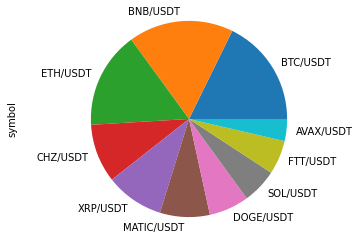

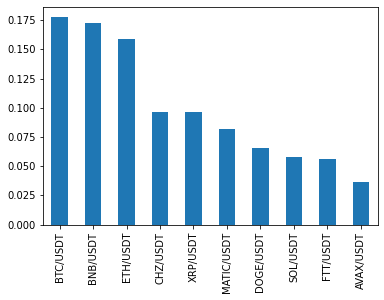

In [6]:
# Diagramme en secteurs
data["symbol"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["symbol"].value_counts(normalize=True).plot(kind='bar')
plt.show()

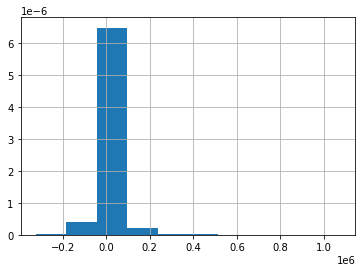

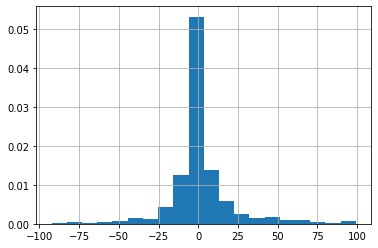

In [7]:
# Histogramme
data["resultat"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.resultat.abs() < 100]["resultat"].hist(density=True,bins=20)
plt.show()

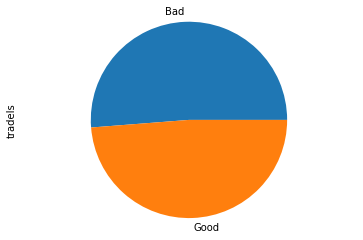

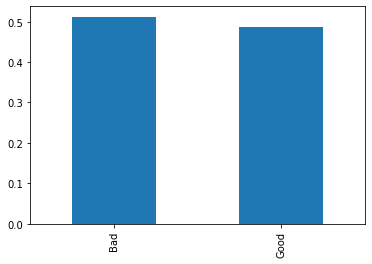

In [8]:
# Diagramme en secteurs
data["tradeIs"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["tradeIs"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [9]:
data.describe()

,price,frais,fiat,coins,wallet,resultat,resultat%,walletAth,drawDown,drawDownPct
count,3643.000000,3643.000000,3.643000e+03,3.643000e+03,3.643000e+03,1.821000e+03,1821.000000,3.643000e+03,3.643000e+03,3643.000000
mean,3495.783756,435.859886,5.390630e+05,4.165565e+05,1.242072e+06,3.056576e+03,0.754650,1.431663e+06,1.895905e+05,0.062487
std,10299.010407,749.223617,1.266721e+06,2.514684e+06,2.134944e+06,5.769931e+04,7.004902,2.486900e+06,5.423551e+05,0.081110
min,0.001841,0.033773,0.000000e+00,0.000000e+00,9.783227e+01,-3.235245e+05,-9.561489,9.996500e+01,0.000000e+00,0.000000
25%,0.362840,0.215493,0.000000e+00,0.000000e+00,6.147753e+02,-1.676873e+01,-0.596834,6.227640e+02,6.866236e+00,0.006371
50%,23.099000,0.795290,4.322481e+02,5.063250e-03,2.273172e+03,-1.414337e-01,-0.020343,2.600028e+03,9.921478e+01,0.037233
75%,592.340000,526.906573,7.046184e+03,4.997505e+02,1.479461e+06,2.464609e+01,0.925700,1.480048e+06,2.374398e+04,0.084884
max,68080.370000,2551.476127,6.729648e+06,3.568778e+07,6.740565e+06,1.074217e+06,258.343402,6.740565e+06,2.537772e+06,0.376492


In [10]:
data = data.set_index(data['date'])
data.index = pd.to_datetime(data.index)
data['resultat'] = data['wallet'].diff()
data['resultat%'] = data['wallet'].pct_change()*100
data.loc[data['position'] == 'Buy', 'resultat'] = None
data.loc[data['position'] == 'Buy', 'resultat%'] = None

data['tradeIs'] = ''
data.loc[data['resultat'] > 0, 'tradeIs'] = 'Good'
data.loc[data['resultat'] <= 0, 'tradeIs'] = 'Bad'

data['walletAth'] = data['wallet'].cummax()
data['drawDown'] = data['walletAth'] - data['wallet']
data['drawDownPct'] = data['drawDown'] / data['walletAth']

initalWallet = 100
wallet = data.iloc[-1]['wallet']
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100

reasons = data['reason'].unique()

print("Final balance :", round(wallet, 2), "$")

Final balance : 4773367.21 $



----- Plot -----


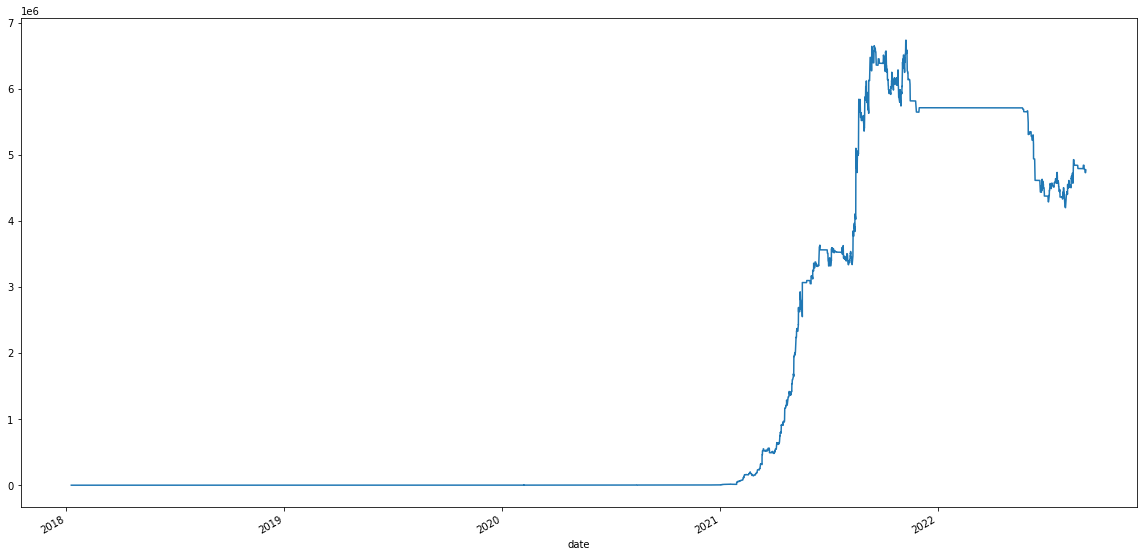

In [11]:
BTobject = Backtesting()
BTobject.plot_wallet_evolution(data)


In [17]:
print("-- Sharpe Ratio --")
data = ()
for asset in data:
    data = data[asset]
    sharpe_ratio = 365**0.5 * (data["resultat%"].mean() / data["resultat%"].std())
    print(f"{asset}: {round(sharpe_ratio, 2)}")



-- Sharpe Ratio --
